In [1]:
%load_ext autoreload
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from faces_clustering import FaceSearcher, get_files_folder

Using TensorFlow backend.


In [2]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Image Searching

## Best Results

In [ ]:
path = '../results'
files = get_files_folder(path, criteria=lambda file: file.endswith('results_removed.csv'))

In [ ]:
rsts = {}
for file in files:
    backbone = file.split('/')[-1].split('_')[0]
    rsts[backbone] = pd.read_csv(file, index_col=0)

In [ ]:
df_rsts = pd.concat(rsts.values(), keys=rsts.keys())
df_rsts

## Evaluating Distances

In [ ]:
df_embeddings = pd.read_pickle('../data/leg55_clusters_senet50.pkl')
distance_col = 'd_cluster_agglomerative'

In [ ]:
df_embeddings[distance_col].plot.hist(bins=100, figsize=(12, 3))

In [ ]:
df_embeddings[distance_col].describe()

### Medida 1: Baseado na pior distância para centroide

In [ ]:
max_thresh = df_embeddings[distance_col].max() + df_embeddings[distance_col].std()

In [ ]:
max_thresh

In [12]:
softmax = lambda x: np.exp(x)/sum(np.exp(x))
m1 = lambda x: softmax((1/x).nlargest(5))

### Maior Distância - Classificado Errado

In [ ]:
info_wrong = df_embeddings.iloc[df_embeddings[distance_col].argmax()]

In [ ]:
display_image(info_wrong.urls)

#### Quem é

In [ ]:
display_image(df_embeddings.loc[df_embeddings['classes']==info_wrong.classes].urls.values[0])

#### Quem disse que é

In [ ]:
display_image(df_embeddings.loc[df_embeddings['cluster_agglomerative']==info_wrong.
                                cluster_agglomerative].urls.values[0])

## Searching

In [3]:
from faces_clustering import display_image

In [8]:
filename1 = '../tests/deputados.jpg'
filename2 = '../tests/doggo.jpg'
filename3 = '/home/paulo/Documentos/slnp_faces_leg_55/62881_b/10_0.jpg'
filename4 = '../tests/carnaval.jpeg'

In [4]:
df_embeddings = pd.read_pickle('../data/valid/distances/senet50_agglomerative.pkl')

In [5]:
df_embeddings.head()

,urls,embeddings,classes,cluster_kmeans,cluster_affinity,cluster_agglomerative,d_cluster_agglomerative
0,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.17480865, 0.24839097, 0.018389545, 0.398058...",74385_b,26,575,344,0.01517
1,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.07091311, 0.04615592, 0.0, 6.4110007, 3.386...",74385_b,98,0,254,0.08413
4,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.10499452, 2.5098183, 0.0, 5.429726, 0.61141...",74385_b,98,0,254,0.07104
5,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.017898438, 1.6189704, 0.0022666005, 5.99468...",74385_b,98,0,254,0.08480
6,/home/paulo/Documentos/slnp_faces_leg_55/74385...,"[0.02720209, 4.4259987, 0.006993143, 5.375417,...",74385_b,98,0,254,0.07142


In [6]:
searcher = FaceSearcher(face_embs = df_embeddings, classes_col = 'cluster_agglomerative', distance_col='d_cluster_agglomerative')

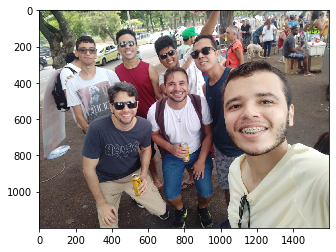

In [15]:
display_image(filename4)
faces, results = searcher.closest_centroids(filename4)

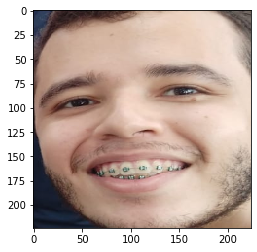

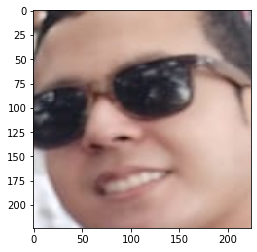

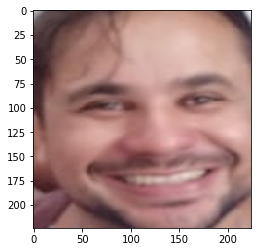

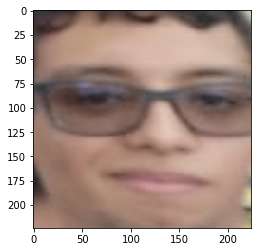

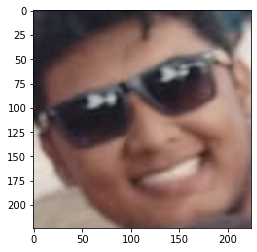

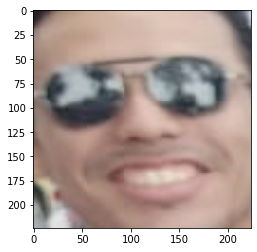

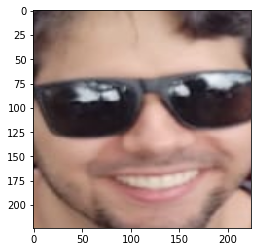

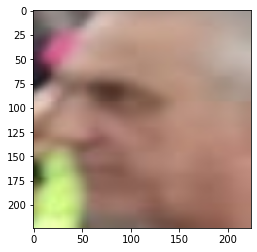

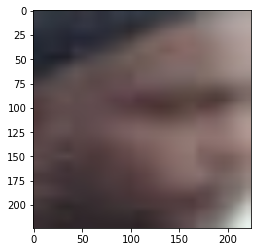

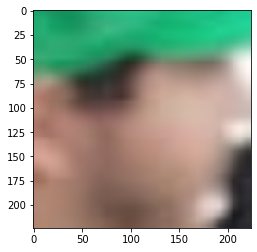

In [16]:
import matplotlib.pyplot as plt
for face in faces:
    plt.figure()
    plt.imshow(face)

In [26]:
m1(results[9]).nlargest(10)

cluster_agglomerative
344   0.35806
12    0.22806
462   0.22113
15    0.10032
184   0.09243
dtype: float64